In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = "svg" 
from IPython.core.display import HTML
display(HTML("""
<style>
h1, h2, h3, h4, h5, h6{
    font-family: "Times New Roman", serif;
}
li, p{
    font-size: 18px;
    font-family: "Times New Roman", serif;
}
.jp-RenderedHTMLCommon p{
    text-align: justify;
} 
.output, .jp-Cell-outputWrapper{
    display: flex;
    margin-left: auto;
    margin-right:auto;
    align-items: center;
    text-align: center;
}
</style>
"""))

import warnings 
warnings.filterwarnings('ignore')

warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.precision', 1)
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams.keys()
plt.rcParams.update({"font.size": 12, 
                     "font.family": "Times New Roman",
                     "figure.titlesize": 14.5,
                     "axes.titlesize":12, 
                     "figure.dpi": 150
                    })
df = pd.read_pickle("acElecDataClean.pkl")

colPal = ["#FF0000", "#0000FF"]
colOrder = ["PSOE", "PP"]
yearParams = [[1978, 2022], [1978, 1992], [1993, 2010], [2011, 2014], [2015, 2018], [2019, 2021]]

# PSOE and PP Autonomous Community election result analysis from 1978 to 2019

This report provides a basic analysis of the election results of Spain's two major national parties, the Partido Socialista Obrero Español (PSOE) and the Partido Popular (PP), at the Autonomous Community (AC) level from 1978 to 2019. At the national level, the period from 1978 to 2019 can be divided into roughly four periods, a period of political dominance of the PSOE from 1978 to 1992, followed by a period of relatively even competition between the PP and PSOE from 1993 to 2010. From 2011 to 2014, both major parties experienced important electoral setbacks, inaugurating a "new era" of Spanish politics from 2015 to 2019. The aim of the subsequent analysis is to provide an overview of the performance of the POSE and PP at the sub-national AC level. The next section will provide a more detailed discussion of the aforementioned periods. Thereafter, the electoral data will be analyzed, focusing on election results as well as election result changes both on average and across time. 

## National background to AC elections
At the national level, both the PSOE and PP have experienced important periods of electoral growth and decline. Generally speaking, the massive losses of the Unión de Centro Democrático (UCD) at the national elections of 1982 permitted the PSOE to become the largest party in parliament, followed by the Alianza Popular (AP), the predecessor of today's PP. From 1982 to 1989, the PSOE enjoyed a clear electoral dominance over the PP. Nonetheless, the PSOE's advantage began to recede especially from 1989, the PP narrowly losing and then winning the national elections of 1993 and 1996. As a consequence, from 1993 to 2010, the PSOE and PP competed with one another as more or less equally strong contenders. Nonetheless, following the PSOE's victory in 2008, the outbreak of the global financial crisis led to a significant loss of electoral support for the socialists and returned the PP to government in 2011 with an absolute majority. Nonetheless, by 2015 the PP too had become increasingly unpopular, leading to the breakthrough of two new national parties, Podemos and Ciudadanos. Both were significant political actors until at least 2019. The following two sections will provide an overview of the electoral performances of the PSOE and PP at the AC level during these different periods, in order to trace the evolution of the sub-national political clout of Spain's two biggest political parties. 

## Data analysis
The boxplot below shows the distribution of vote results across the different ACs by party. A number of general observations can be made. Firstly, taking the median as a point of departure, the PSOE's performance has been the worst in País Vasco, Navarra, and Galicia. The PP's performance has been the worst in Cataluña, País Vasco and Canarias. It is noticeable that the PP's performance in Cataluña and País Vasco is worse by a clear margin both when compared to the PP's electoral results in other ACs and when compared to the PSOE's worst results. The PSOE's performance has been best in Extremadura, Castilla-La Mancha and Andalucía, where the medians lie above 45 percent. The PP has done particularly well in Madrid, Galicia and Castilla y León, although its performance has also been similarly positive in La Rioja. That the PP's predecessor party, the AP, was initially quite unpopular, is also reflected in its comparatively larger interquartile ranges in a number of ACs. This is particularly noticeable in ACs where the party later enjoyed great popularity, such as in Navarra (in alliance with the Unión del Pueblo Navarro (UPN)), Valencia, Murcia and Madrid. The PSOE's interquartile range is especially large in Cantabria and Cataluña. There are also a number of outliers. The PSOE did exceptionally well in Navarra in 1983 and 1991 as well as in País Vasco in 2009. The PP did unusually bad in Galicia in 1981 and in Cantabria in 2009. 

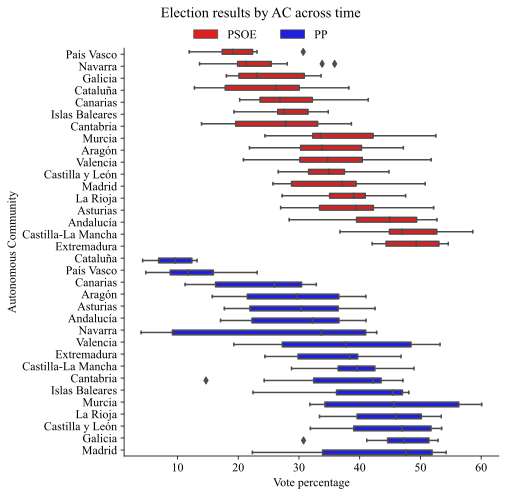

In [2]:
### Boxplot, PSOE and PP by AC across time (boxplot)
majorParties = df[(df["party"].isin(["PSOE", "PP"]))].sort_values("AC")
orderPlot = majorParties.groupby(["party", "AC"]).votePerc.median().reset_index().sort_values(["party", "votePerc"], ascending = [False, True])
orderPlot.set_index(orderPlot.party+orderPlot.AC, inplace = True)
orderPlot.index.values

majorParties.set_index(majorParties.party+majorParties.AC, inplace = True)
majorParties["majorPartiesCats"] = majorParties.index.values
plotBox = sns.catplot(x = "votePerc", 
            y = "majorPartiesCats", 
            kind = "box", 
            palette = colPal,
            hue = "party", 
            hue_order = ["PSOE", "PP"],
            order = orderPlot.index.values,
            height=6.5, 
            aspect=1.2, 
            data = majorParties,
            facet_kws={'legend_out': False})
sns.move_legend(
    plotBox, "lower center",
    bbox_to_anchor=(.5,.965),
    ncol=2,
    title=None,
    frameon=False,
    fontsize = 12)
plotBox.set_yticklabels(majorParties.groupby(["party", "AC"]).votePerc.median().reset_index().sort_values(["party", "votePerc"], ascending = [False, True])["AC"])
plt.xlabel("Vote percentage")
plt.ylabel("Autonomous Community")
plotBox.fig.suptitle("Election results by AC across time", y = 1.06, size = 14.5);

The next plot shows the electoral results of both parties across all ACs. It becomes evident that AC electoral trends reflect the national ones, which were described in the previous section. Based on this data, the following key observations can be made:
- In the majority of ACs, the PSOE was the initially dominant party, with the exception of Cantabria, Galicia and Islas Baleares, where the PP was more popular from the start and in which the PP maintained a strong dominance with only one exception throughout the entire period (despite heavy losses in the former and the latter two ACs).
- There are a number of ACs which became highly contested between the two parties during the 1990s and 2000s, which include Aragón, Asturias and Canarias.
- There are a number of ACs in which the PP established dominance during the 1990s and 2000s, including Cantabria, Castilla y León, La Rioja, Madrid, Murcia, Navarra and Valencia.
- There are a number of ACs in which the PSOE could hold onto its electoral dominance until roughly 2011, namely in Andalucía, Castilla-La Mancha, Cataluña and Extremadura. 
- The PSOE, starting from a high degree of popularity in most ACs, experienced important setbacks around 1995, thereafter peaking again in the majority of ACs in the 2000s, after which a massive and continuous decline set in, which was only partially reversed in 2019. 
- The PP, from a lower starting point, increased in popularity until peaking or plateauing in most ACs around 1995. It experienced another peak in popularity around 2011. Thereafter, however, the PP also suffered massive electoral declines, which continued into 2019.  


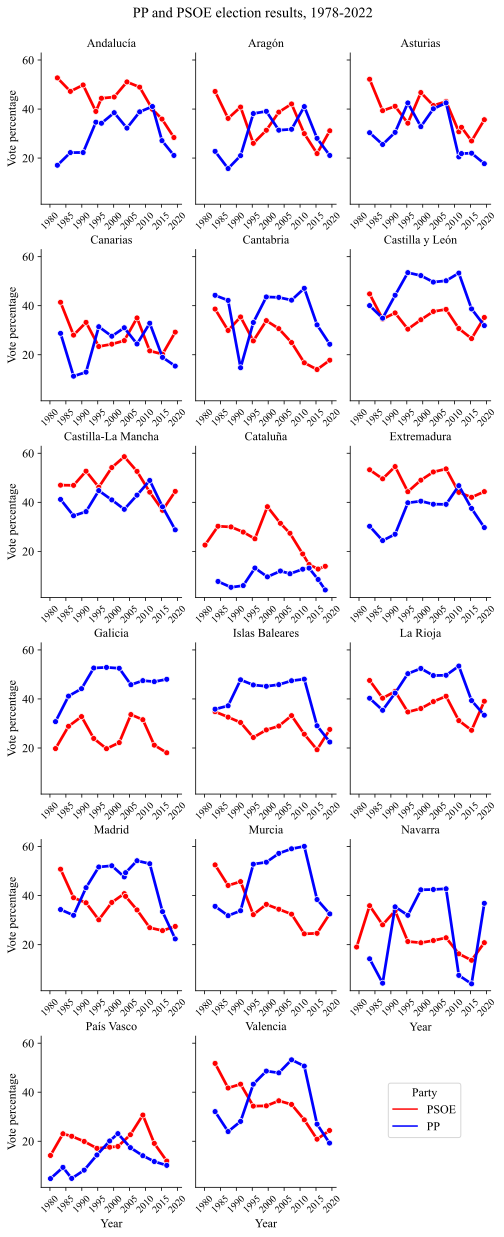

In [3]:
### Main parties across time periods by AC
majorParties.reset_index(drop = True, inplace = True) 
def partySysPhases(yearStartEnd, df = majorParties, y = "votePerc", titleInsert = "election results",
                   hline = False):
    """yearStartEnd is list containing integer of start and integer of end of period """
    yearStart = yearStartEnd[0]
    yearEnd = yearStartEnd[1]
    df = df[df["year"].isin([i for i in range(yearStart, yearEnd)])].sort_values("AC")
    fig1 = sns.relplot(x= "date", y = y, 
                       hue="party", 
                       palette = colPal, 
                       hue_order = colOrder, 
                       kind="line", 
                       linewidth = 2.75,
                       height = 2.8,
                       aspect = 2.4/2.8,
                       marker = "o", 
                       col = "AC", 
                       col_wrap = 3, 
                       data = df,
                       facet_kws={'legend_out':False})
    fig1._legend.set_title("Party")
    sns.move_legend(fig1, "upper left", bbox_to_anchor=(.75, .13))
    fig1.fig.suptitle("PP and PSOE "+titleInsert+", "+str(yearStart)+"-"+str(yearEnd), y = 1.015, size = 14.5)
    fig1.set_axis_labels("Year", "Vote percentage")    
    axes = fig1.axes.flatten()
    for i, name in enumerate(df.AC.unique()):
        axes[i].set_title(name)
    for ax in axes:
        ax.tick_params(axis = "x", labelbottom=True, labelsize = 10, labelrotation = 45)
        if hline == True:
            ax.axhline(0, linestyle = "--", color = "black")
    plt.subplots_adjust(wspace = 0.1, hspace=0.3)
    plt.show(fig1)
    return fig1
g = partySysPhases(yearParams[0]);

The electoral trends at the AC level described above can thus, with noticeable exceptions, be said to reflect national electoral trends, with the peaks and troughs of the two major parties clearly complementing each other until 2015, when two new national contenders experienced their breakthrough and were capable of absorbing the voters' dissatisfaction toward the PP and PSOE without benefiting either one of the two major parties. The following plot summarizes these developments visually with a rolling average (shown in black), necessary since some ACs, especially Cataluña, País Vasco and Andalucía, hold elections at other points in time than the rest of ACs.

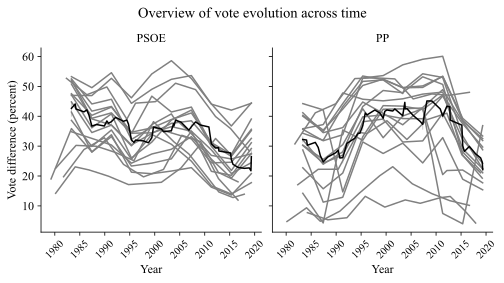

In [4]:
### Diff in percentage with rolling average, one plot for trend
majorParties = majorParties.sort_values(["AC", "party", "year", "month"])
majorParties["votePercLagged"] = majorParties.groupby(["AC", "party"])["votePerc"].shift(1)
majorParties["votePercDiff"] = majorParties.votePerc - majorParties.votePercLagged

#17 comunidades, 13 normalmente votan juntos
majorParties2 = majorParties
majorParties2['rollingVotePerc'] = majorParties.sort_values(["year", "month"]).groupby("party")["votePerc"].transform(lambda x: x.rolling(13).mean())
majorParties2 = majorParties2[["rollingVotePerc", "party", "date"]].rename({"rollingVotePerc":"votePerc",}, axis = "columns")
majorParties2["AC"] = "yRollingAvg"
majorPartiesRoll = pd.concat([majorParties, majorParties2]).reset_index(drop=True)

fig2 = sns.relplot(x = "date", y = "votePerc", 
                   col ="party", 
                   col_order = colOrder,
                   hue = "AC",
                   height = 3.6,
                   aspect = 1,
                   palette = ["gray"]*(len(majorPartiesRoll.AC.unique())-1)+["black"],
                   kind = "line",
                   legend = False,
                   data = majorPartiesRoll) 
fig2.fig.suptitle("Overview of vote evolution across time", y = 1.05, size = 14.5) # Title size
fig2.set_axis_labels("Year", "Vote difference (percent)")
plt.subplots_adjust(wspace = 0.05)
#plt.ylim(reversed(plt.ylim()))
axes = fig2.axes.flatten()
for i, name in enumerate(colOrder):
    axes[i].set_title(name)
for i, axis in enumerate(axes): 
    axes[i].tick_params(axis = "x", labelbottom=True, labelsize = 10.5, labelrotation = 45);


Having discussed the general evolution of the vote across ACs, the following section will provide a more detailed, but nonetheless concise, account of these changes.

## The dominance of the PSOE and PP over the different party system periods
The following heatmap plots provide a quick visual overview over the average electoral results by the PSOE and PP across the different phases of the major parties' electoral performance. 

As can be seen in the plot below, the first period of AC elections from 1978 to 1992 was clearly characterized by the PSOE's dominance over the PP. In nine communities, the PSOE achieved higher average vote results than the PP achieved in any AC during that same period. Especially noticeable are Extremadura, Andalucía, Castilla-La Mancha, Murcia and Valencia, where the PSOE won more than 45 percent of the vote on average. The only ACs where the PP led by a clear margin were Castilla y León, Islas Baleares and Galicia. The PSOE achieved its worst results in the most nationalist regions, namely Cataluña, País Vasco, Galicia and Navarra, ranging between 19.8 and 29.2 percent. The PP performed especially bad in Cataluña and País Vasco, winning only an average 6.5 and 6.8 percent of the vote. In Aragón, Navarra and Canarias, the PP's results ranged from a mean 17.6 to 19.8 percent. 

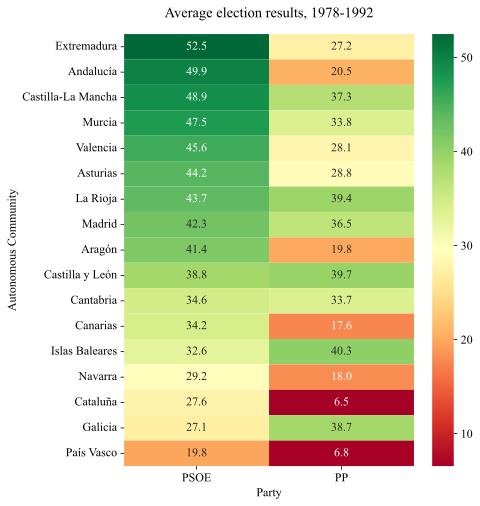

In [5]:
### Heatmaps across time
def heatMap(yearStartEnd, df = majorParties):  
    yearStart = yearStartEnd[0]
    yearEnd = yearStartEnd[1]
    df = df[df["year"].isin([i for i in range(yearStart, yearEnd)])]
    df = df[["AC", "party", "votePerc"]].pivot_table(columns="party", index="AC", values ="votePerc").iloc[:,[1,0]].sort_values("PSOE", ascending = False)
    df = df.astype("float")
    plt.figure(figsize = (6.5,6.5*1.2))
    heatMap = sns.heatmap(df, annot=True, fmt=".1f", cmap ="RdYlGn")
    plt.xlabel("Party")
    plt.ylabel("Autonomous Community")
    heatMap.set_title("Average election results, " + str(yearStartEnd[0]) + "-" + str(yearStartEnd[1]), y = 1.025, size = 14.5)
    return heatMap
out = heatMap(yearParams[1])    

The following period from 1993 to 2010, visualized below, brought significant changes. The PP achieved an impressive mean of 55.7 percent in Murcia and between 50.3 and 51.4 percent of the mean vote in Galicia, La Rioja, Madrid and Castilla y León. Except for Cataluña, where the party's performance continued to be comparatively dismal, having increased to only 11.4 percent, it achieved significant increases where it had previously been rather weak. The most emblematic of these case was País Vasco, where the conservatives achieved a mean of 17.8 percent, Canarias, were the PP's mean vote percentage rose to 28.6, and Navarra, where it reached 39.9 percent. When one compares the number of ACs where each party scored a mean result of 39 percent or more, these changes become all the more evident: the PP did so in 12 ACs, the PSOE only in four, namely Castilla-La Mancha, Extremadura, Andalucía and Asturias.  

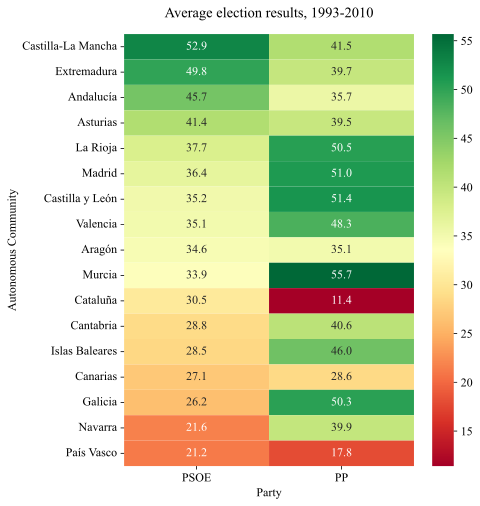

In [6]:
out = heatMap(yearParams[2])    

The period from 2011 to 2014 basically saw a continuation of the antagonistic trends of a PSOE decline and a PP ascendancy. The PP grew stronger in most ACs, although its difficulties especially in the more nationalist ACs, where the conservatives only won between 7.5 and 13.2 percent, and in Asturias, an exceptional case due to a political schism, are noticeable. While the PP won more than 45 percent of the vote in ten ACs, the PSOE did not achieve such high results in any AC and instead declined to new lows. In no less than five ACs, the party had either matched or fallen below 21.2 percent, the socialists' worst result from the 1993 to 2010 period. In all but three ACs, the PSOE vote percentage averages lay below 32 percent of the vote. 

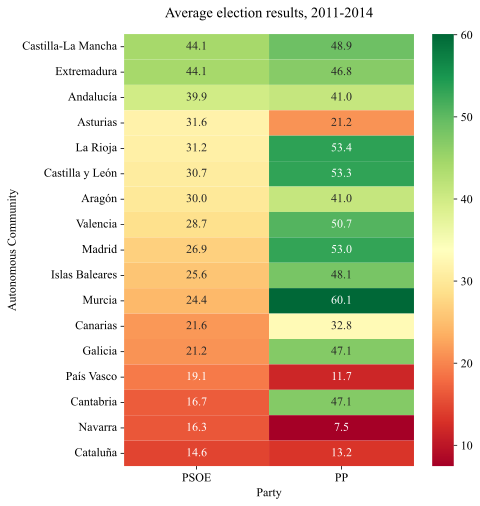

In [7]:
out = heatMap(yearParams[3])    

While the period from 2015 to 2018 brought no reversal of fortune for the PSOE, which continued its across the board decline, except for minuscule gains in Murcia, the PP began to suffer electoral setbacks as well. Only Galicia continued to come close to 50 percent of the vote, with 48 percent, while the party continued to score between 37.5 and 39.3 percent in five ACs. In ten ACs, its results had fallen to below 30 percent, its performance being particularly bad in Navarra, with four percent, in Cataluña, with 6.4 percent, and in País Vasco, with 10.2 percent. 

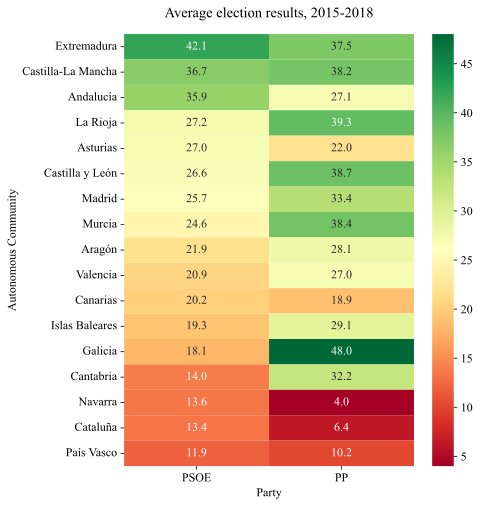

In [8]:
out = heatMap(yearParams[4])    

Finally, in 2019 the PSOE saw some significant electoral gains, while the PP continued to decline. In Castilla-La Mancha and Extremadura, the socialists achieved almost the same result, around 44.5 percent, as well as 39.1 percent in La Rioja and between 31.1 and 35.6 percent in another four ACs. The PP, on the other hand, only achieved between 31.9 and 36.9 percent in four ACs. In three ACs, the PP had fallen below 20 percent, the PSOE in two.   

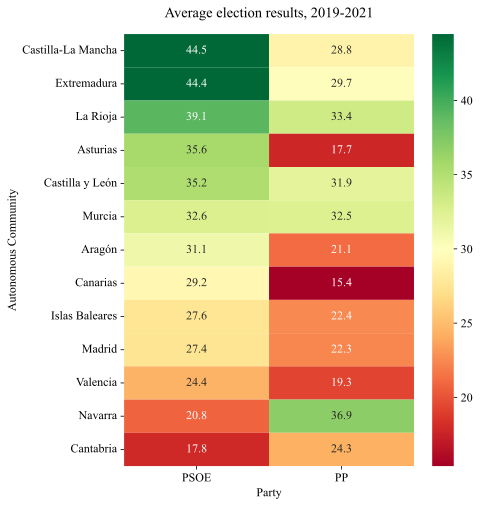

In [9]:
out = heatMap(yearParams[5])

## Vote change across time
Another way to analyze these changes is to look at vote percentage differences from one election to the next. The graph below, which does this for the entire 1978 to 2022 period, shows that, at least in general, when one party makes large gains in one AC, this is usually accompanied by large losses of the other. There are some important exceptions to this general trend, such as in Cantabria, Islas Baleares as well as in Asturias and Navarra in 2011, all exceptions which can be attributed to regionalist and nationalist parties. Even in País Vasco and Cataluña, however, where nationalist parties are of great importance, this seesaw pattern is evident. 

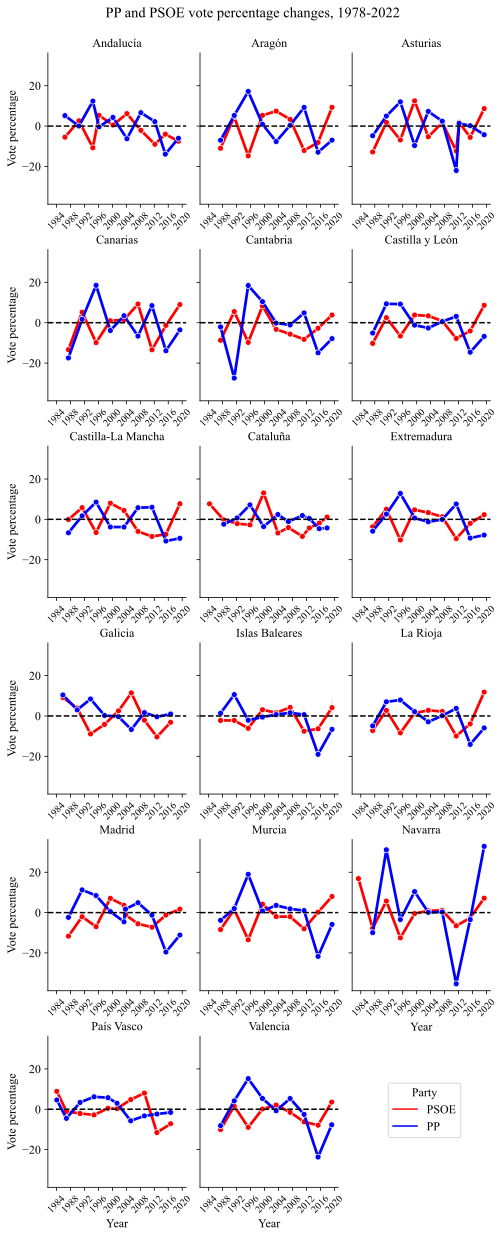

In [10]:
### Diff in percentage of vote across time by AC
partySysPhases(yearParams[0], df = majorParties, y = "votePercDiff", hline = True, titleInsert = "vote percentage changes");


A better overview in vote change can be obtained by considering the following graph. It shows mean vote differences for the two major parties across the different time periods. On average, from 1978 to 1992, the PSOE experienced slight average losses (-0.8 percent) and the PP slight gains (0.2) close to zero percent. In the 1993 to 2010 period, the PSOE, which experienced both losses around 1995 and a recovery around 2004, was again largely able to contain its mean losses to near zero (-0.6), while the PP experienced average gains of 2.7 percent. The period from 2011 to 2014, however, was marked by massive average declines for the PSOE, which fell by 8.4 percent on average, while the PP only experienced slight losses (-0.8 percent). From 2015 to 2018, the PSOE's losses, falling by roughly half to four percent, were still substantial. At the same time, the PP experienced massive losses of some 10.9 percent on average. In the round of elections in 2019, the PSOE witnessed a partial electoral recovery, growing by 6.4 percent on average, while the PP still suffered important losses, which averaged -3.9 percent. As is indicated by the large differences in standard deviation between the two parties, indicated by the error bars in the plot, after 2010, the PSOE's losses and gains across ACs tended to be rather similar in magnitude, while those of the PP tended to be more disparate. The latter suggests that losses and recoveries are milder in some and extremer in other ACs. As the preceding graph shows, for instance in the year 2019, the PP's recovery was particularly pronounced in Navarra (through Navarra Suma), Islas Baleares, Murcia and Valencia, while changes in País Vasco, Galicia, Cataluña and Asturias were rather minor.    

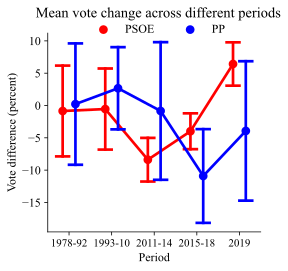

In [11]:
### Means and std for different periods
period = []
for year in majorParties["year"]:
    if year < 1993:
        period.append("1978-92")
    elif year < 2011:
        period.append("1993-10")
    elif year < 2014:
        period.append("2011-14")
    elif year < 2019:
        period.append("2015-18")
    else:
        period.append("2019")
majorParties["period"] = period
majorParties["period"] = majorParties.period.astype("category")

stats = majorParties.groupby(["period", "party"])[["votePercDiff"]].agg(["mean", "std"]).round(2).reset_index().sort_values("party", ascending = False)
fig3 = sns.catplot(x = "period", y= "votePercDiff", hue = "party", kind = "point", 
            palette = colPal,
            hue_order = colOrder,
            ci = "sd",
            dodge = .3,
            height = 3.6,
            aspect = 1.1,
            capsize = .3,
            linewidth = 0.5,
            data = majorParties,
            facet_kws={'legend_out': False})
fig3.axes.flatten()[0].tick_params(axis = "x", labelbottom=True, labelsize = 11)
fig3.set_axis_labels("Period", "Vote difference (percent)")
sns.move_legend(
    fig3, "lower center",
    bbox_to_anchor=(.5,.9),
    ncol=2,
    title=None,
    frameon=False,
    fontsize = 12)
fig3.fig.suptitle("Mean vote change across different periods", y = 1.05, size = 14.5);


## The drastic loss of regional power and conclusion
The drastic electoral losses experienced by both major parties over the last approximately ten years have, as one would expect, also led to a significant loss of political power. This is best reflected in the massive changes in parliamentary absolute majorities at the AC level, which can be appreciated in the following graph. Whereas from 1978 to 1992, the PP only boasted four absolute majorities, it achieved 24 absolute majorities in the subsequent period from 1993 to 2010. The PSOE, on the other hand, experience a decline from 19 to 10 absolute majorities in those same periods. From 2011 to 2019, however, the PSOE would win only one absolute majority (in 2019). The PP met a similar, albeit delayed, fate. After dropping from 24 to nine absolute majorities by the end of 2014, that number dropped to two for the 2015 to 2018 period and to zero in 2021. 

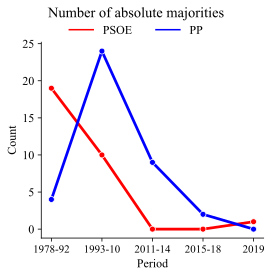

In [12]:
### Absolute majorities
absMaj = majorParties[majorParties["depsPerc"] >= 50].groupby(["party", "AC"])[["AC"]].count().rename({"AC":"Count"}, axis = 1)
absMaj = absMaj[absMaj["Count"]!=0].sort_values(["party", "Count"], ascending = False)
# also by period
absMajPeriod = majorParties[majorParties["depsPerc"] >= 50].groupby(["party", "period", "AC"])[["AC"]].count().rename({"AC":"Count"}, axis = 1)
absMajPeriod = absMajPeriod[absMajPeriod["Count"]!=0].sort_values(["party", "period", "Count"], ascending = [True, False, False]).reset_index()
absMajAgg = absMajPeriod.groupby(["period", "party"]).sum("Count").reset_index()
fig4 = sns.relplot(x= "period", 
            y= "Count", 
            hue="party", 
            palette = colPal, 
            hue_order = colOrder, 
            linewidth = 2.75, 
            height = 3.6,
            aspect = 1.1,
            marker = "o",  
            kind="line", 
            data = absMajAgg,
            facet_kws={'legend_out': False})
sns.move_legend(
    fig4, "lower center",
    bbox_to_anchor=(.5,.92),
    ncol=2,
    title=None,
    frameon=False,)
fig4.axes.flatten()[0].tick_params(axis = "x", labelbottom=True, labelsize = 11)
fig4.set_axis_labels("Period")
fig4.fig.suptitle("Number of absolute majorities", y = 1.075, size = 14.5);

Overall, this analysis has shown that AC election outcomes tend to follow, with some noticeable exceptions, national political trends. The different points of departure for both parties nonetheless resulted in a somewhat contrary initial evolution. While the PSOE experienced - initially very mild and from 2011 devastating - mean electoral losses, the PP grew stronger and stronger until roughly 2015, when it too suffered a series of equally substantial defeats. In 2019, the PSOE recovered somewhat, but compared to the losses experienced in the past, the party is still a long way from recovering. The PP, on the other hand, continued its decline well into 2019.  